### *DATA CHALLENGE 2024*
---
# **Classification of English Learner Proficiency**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

First, let's install required packages where needed and import and use them :)

In [45]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#import os
#import re
import nltk
#import string

import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

#### Load Training Data

In [46]:
data_file = '/kaggle/input/celp/train_data.csv'
df = pd.read_csv(data_file, usecols=['text', 'level'])
print(df)

                                                    text  level
0      \r\r\n      My friend Meg was going out to wor...      3
1      \r\r\n      Hello I'm sorry but i'm on holiday...      0
2      \r\r\n      Name : MaryAge : 62Hair color : bl...      0
3      \r\r\n      hi , my name is laila , i live in ...      0
4      \r\r\n      A pink sweater : 10 $.A black dres...      0
...                                                  ...    ...
20440  \r\r\n      Hi mom and pop!I'm going to the po...      1
20441  \r\r\n      Hello, I don't know if the things ...      2
20442  \r\r\n      I'm Ericka. I live in Paris .I get...      0
20443  \r\r\n      Hi, Jessy! You're on vacation, It'...      0
20444  \r\r\n      Hi, my name is Gregory. I'm thirdy...      0

[20445 rows x 2 columns]


In [47]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)

#### Some preprocessing steps

In [48]:

def remove_punct(text):

#     new_text = word_tokenize(text)
#     new_text = list(filter(lambda token: token not in string.punctuation, new_text))
#     text = " ".join([word for word in new_text])
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_text = tokenizer.tokenize(text)
    text = " ".join([word for word in new_text])

    return text.strip()


def get_sentences(df, text_col, target_col):
    """Returns tuple of each document split by sentence with additional info:
    (sentence, number of words, average length of words, cefr_level, document id)

    Parameters
    ----------
    A dataframe: Pandas dataframe
    Name of text or document column: str
    Name of target column: str

    Returns
    -------
    A tuple
    (See Info Above)
    """
    sentences = []
    for row in df.itertuples():
        text = nltk.sent_tokenize(getattr(row, text_col).strip())
        level = getattr(row, target_col)
        doc = getattr(row, 'Index')
        for sentence in text:
            words = remove_punct(sentence).split()
            if len(words) == 0:
                avg_len_words = 0
            else:
                avg_len_words = sum(len(word) for word in words if len(word) > 0)/len(words)
            sentences.append((sentence, len(words), round(avg_len_words, 2) , level, doc))

    return sentences

In [49]:
sent_df = get_sentences(df, 'text', 'level')

In [50]:
# Break the Data Frame into pieces sentence-wise
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,My friend Meg was going out to work like every...,11,3.64,3,0
1,When she was approaching the corner at Elm and...,28,4.25,3,0
2,Meg decided to go over to them to see if she c...,16,3.25,3,0
3,Suddenly the young woman came at her waving a ...,10,4.00,3,0
4,"She pushed the gun into her stomach, and start...",21,4.62,3,0
...,...,...,...,...,...
116829,I get up at eight .,5,2.60,0,20444
116830,"At ten o'clock, i go sport for my childrens.",10,3.30,0,20444
116831,"At one o'clock, i have Lunch on the fastfood.",10,3.40,0,20444
116832,"In afternoon, i play with my childrens.",7,4.43,0,20444


In [51]:
# Examine the length of the readings by level:
# The chart below show the average number of words and length of the words per document
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,My friend Meg was going out to work like every...,11,3.64,3,0
1,When she was approaching the corner at Elm and...,28,4.25,3,0
2,Meg decided to go over to them to see if she c...,16,3.25,3,0
3,Suddenly the young woman came at her waving a ...,10,4.00,3,0
4,"She pushed the gun into her stomach, and start...",21,4.62,3,0
...,...,...,...,...,...
116829,I get up at eight .,5,2.60,0,20444
116830,"At ten o'clock, i go sport for my childrens.",10,3.30,0,20444
116831,"At one o'clock, i have Lunch on the fastfood.",10,3.40,0,20444
116832,"In afternoon, i play with my childrens.",7,4.43,0,20444


In [52]:
sentence_df.groupby(['level','doc_id'])['level'].mean()

level  doc_id
0      1         0.0
       2         0.0
       3         0.0
       4         0.0
       11        0.0
                ... 
5      17230     5.0
       17611     5.0
       17967     5.0
       18161     5.0
       18531     5.0
Name: level, Length: 20445, dtype: float64

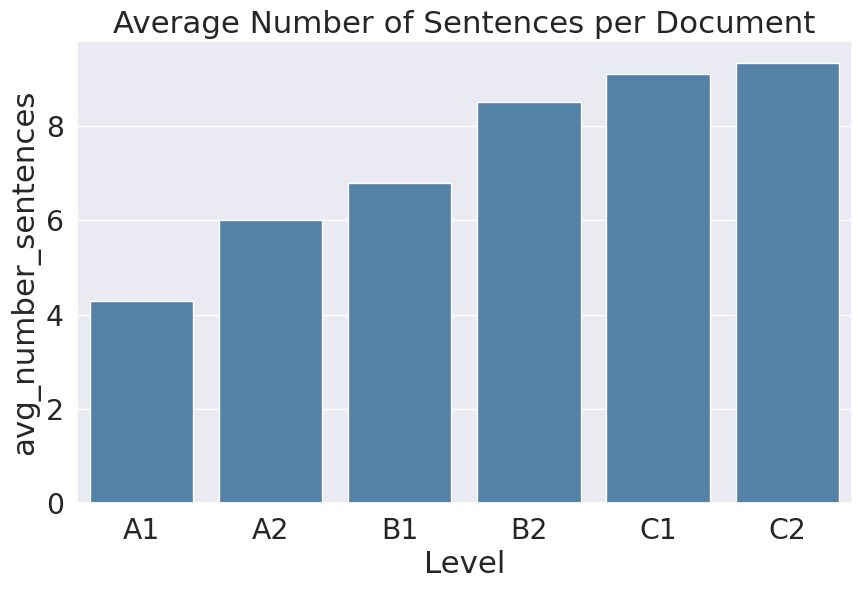

In [53]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'avg_number_sentences': avg})
# ax = df.plot.bar(x='Level', y='Avg Number of Sentences', rot=0).set(title='Average Number of Sentences per Document')

sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.title(label='Average Number of Sentences per Document')

#plt.ylabel("", fontdict=font)

plt.show()

In [54]:
avg_sentences = avg.tolist()
levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
x = range(6)
avg_sentences

[4.283475616886914,
 5.9977260801119465,
 6.791864237584227,
 8.502561183836084,
 9.088471849865952,
 9.325]

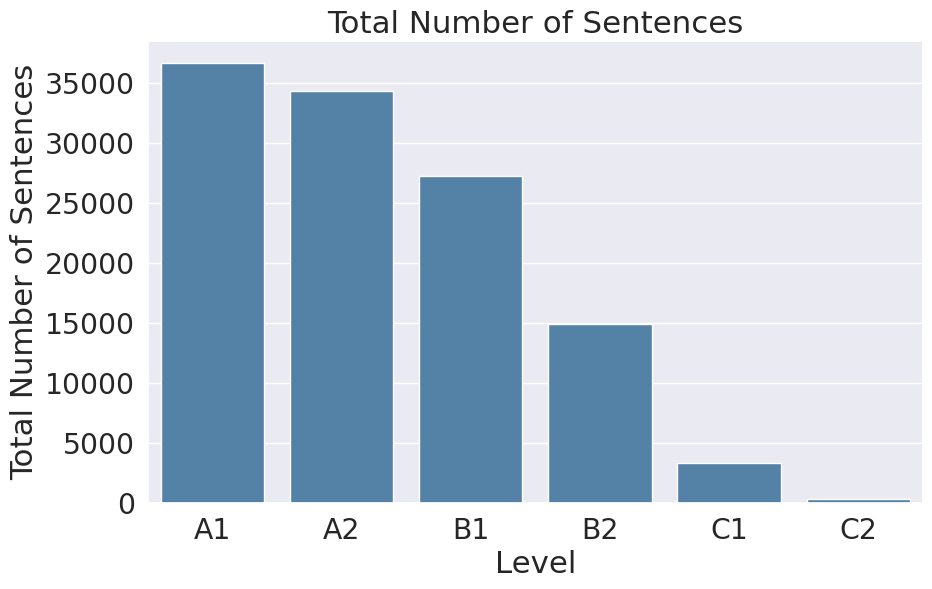

In [55]:
avg1 = sentence_df.groupby(['level']).count()['text']

df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg1})

sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')

plt.title(label='Total Number of Sentences')


plt.show()

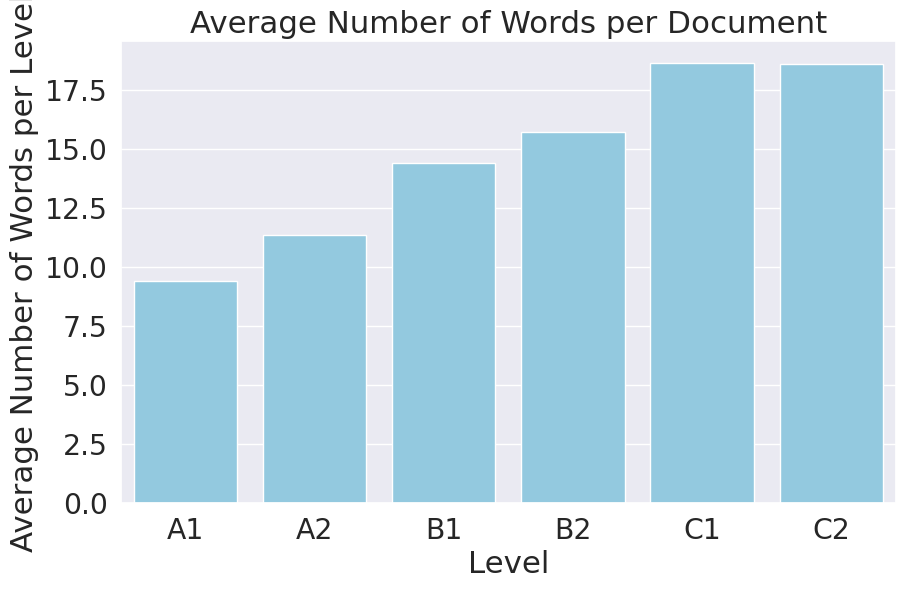

In [56]:
avg = sentence_df.groupby(['level'])['num_of_words'].mean()

df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], 'Average Number of Words per Level': avg})

sns.barplot(data=df, x='Level', y='Average Number of Words per Level', color='skyblue')

plt.title(label='Average Number of Words per Document')

plt.xlabel("Level")

plt.show()

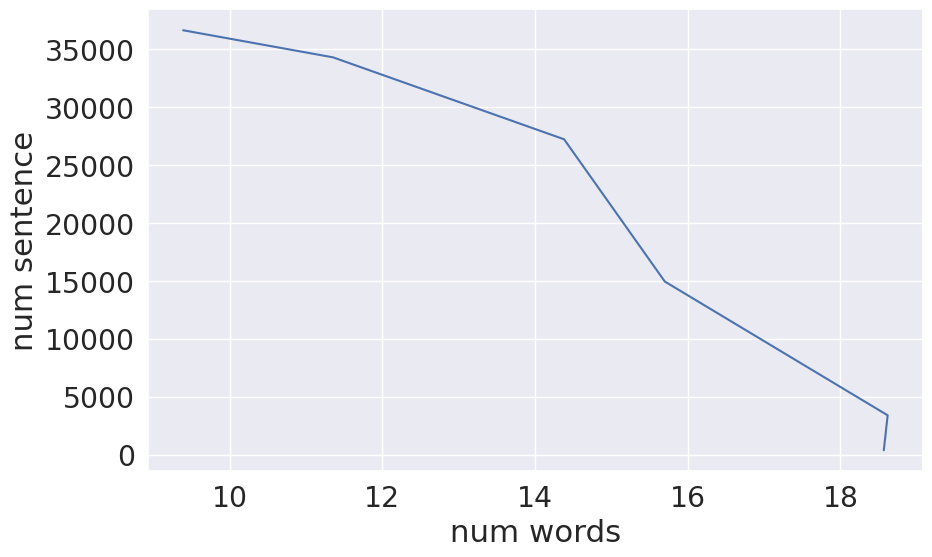

In [57]:
plt.plot(avg, avg1)
plt.xlabel("num words")
plt.ylabel("num sentence")
plt.show()

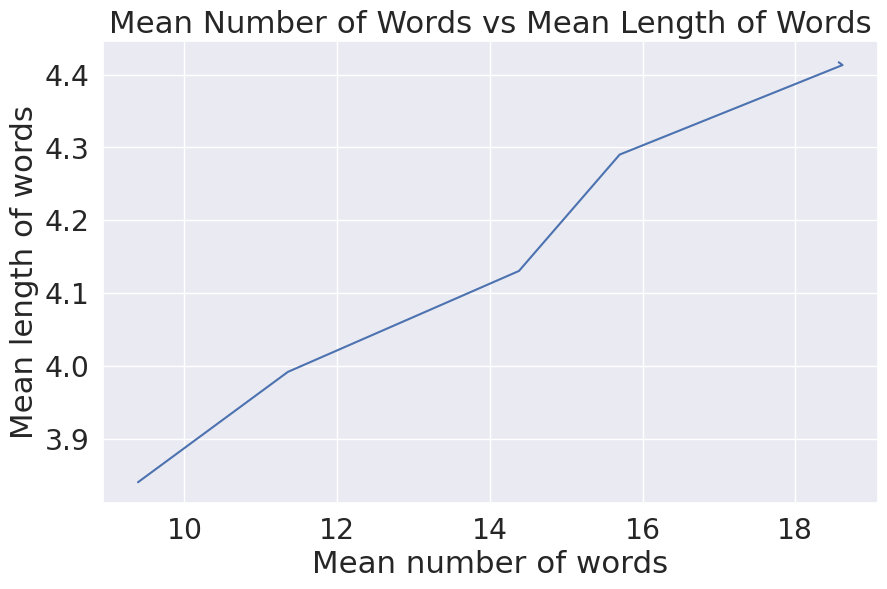

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming sentence_df is your DataFrame
avg3 = sentence_df.groupby(['level'])['avg_len_words'].mean()

plt.plot(avg, avg3)  # 'o' specifies markers on the plot
plt.xlabel("Mean number of words")
plt.ylabel("Mean length of words")
plt.title("Mean Number of Words vs Mean Length of Words")
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = sentence_df[['num_of_words','avg_len_words']]
y = sentence_df[['level']]
X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.25, random_state=16)



Linear regression

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [61]:
acc = reg.score(X_train, y_train)
print(acc)

0.09421330655881266


In [62]:
acc = reg.score(X_Val, y_Val)
print(acc)

0.09248495551875169


LSTM

In [63]:
y_train_temp =  np.where((y_train == 0) | (y_train == 1), y_train, 2)
y_Val_temp =  np.where((y_Val == 0) | (y_Val == 1), y_Val, 2)


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, Reshape, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,GRU
from sklearn.neighbors import KNeighborsClassifier


In [65]:
input_shape = X_train.shape[1:]

optimizer = Adam(lr=0.005)
model = Sequential()
model.add(Reshape((input_shape[0], 1), input_shape=input_shape))
model.add(LSTM(10, return_sequences=True, activation="linear"))
model.add(LSTM(10, return_sequences=True, activation="linear"))
model.add(LSTM(3, activation="linear"))



model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 2, 1)              0         
                                                                 
 lstm_18 (LSTM)              (None, 2, 10)             480       
                                                                 
 lstm_19 (LSTM)              (None, 2, 10)             840       
                                                                 
 lstm_20 (LSTM)              (None, 3)                 168       
                                                                 
Total params: 1488 (5.81 KB)
Trainable params: 1488 (5.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train_temp, batch_size=10, epochs=10, validation_data=(X_Val, y_Val_temp))


8763/8763 [==============================] - 54s 6ms/step - loss: 0.5997 - accuracy: 0.3290 - val_loss: 0.5992 - val_accuracy: 0.4349
Epoch 2/10
8763/8763 [==============================] - 53s 6ms/step - loss: 0.5992 - accuracy: 0.3353 - val_loss: 0.6020 - val_accuracy: 0.3070
Epoch 3/10
4798/8763 [===============>..............] - ETA: 20s - loss: 0.5960 - accuracy: 0.3375

In [69]:
lstm_outputs_train = model.predict(X_train)
lstm_outputs_train = lstm_outputs_train.reshape((lstm_outputs_train.shape[0], -1))
scaler = StandardScaler()
lstm_outputs_train = scaler.fit_transform(lstm_outputs_train)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(lstm_outputs_train, y_train_temp)
lstm_outputs_test = model.predict(X_Val)
lstm_outputs_test = lstm_outputs_test.reshape((lstm_outputs_test.shape[0], -1))
lstm_outputs_test = scaler.transform(lstm_outputs_test)
knn_predictions = knn_classifier.predict(lstm_outputs_test)


 19/913 [..............................] - ETA: 2s 

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


913/913 [==============================] - 3s 3ms/step


In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_Val_temp, knn_predictions)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')



Accuracy on the test set: 44.05%


In [2]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch

# Load pre-trained GPT model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=5)  # Assuming 5 proficiency levels

# Tokenize and prepare your data (replace `texts` and `labels` with your data)
inputs = tokenizer(X_train, padding=True, truncation=True, return_tensors="pt")
labels = torch.tensor(y_train)

# Split your data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.2)

# Create DataLoader for training and validation
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Fine-tune the GPT model
optimizer = AdamW(model.parameters(), lr=5e-5)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=5) 



OSError: Can't load tokenizer for 'gpt2'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'gpt2' is the correct path to a directory containing all relevant files for a GPT2Tokenizer tokenizer.